In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# 1. Data Collection
file_path = 'modified_output (1).csv'
df = pd.read_csv(file_path)


In [3]:
# 2. Data Preparation
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalizing numerical features
scaler = StandardScaler()
df[df_numeric.columns] = scaler.fit_transform(df_numeric)

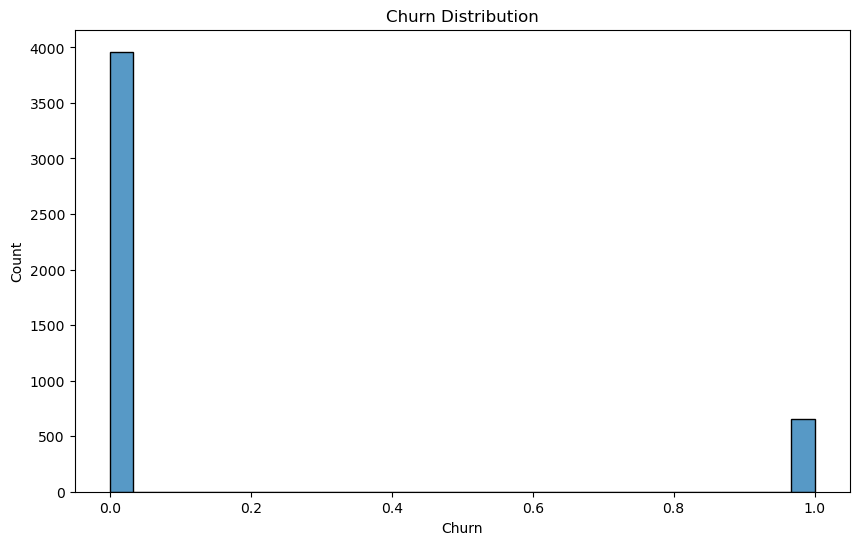

In [4]:
# 3. Exploratory Data Analysis (EDA)
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['Churn'], kde=False, bins=30)
plt.title('Churn Distribution')
plt.show()

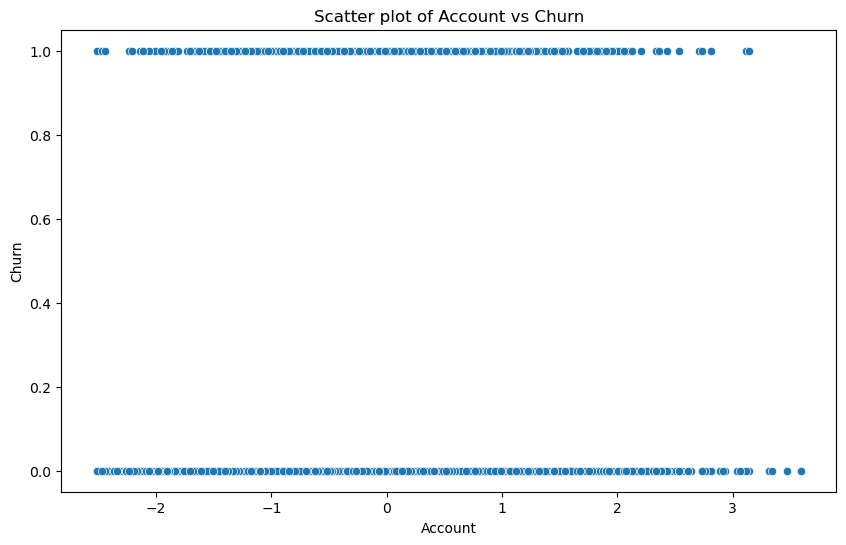

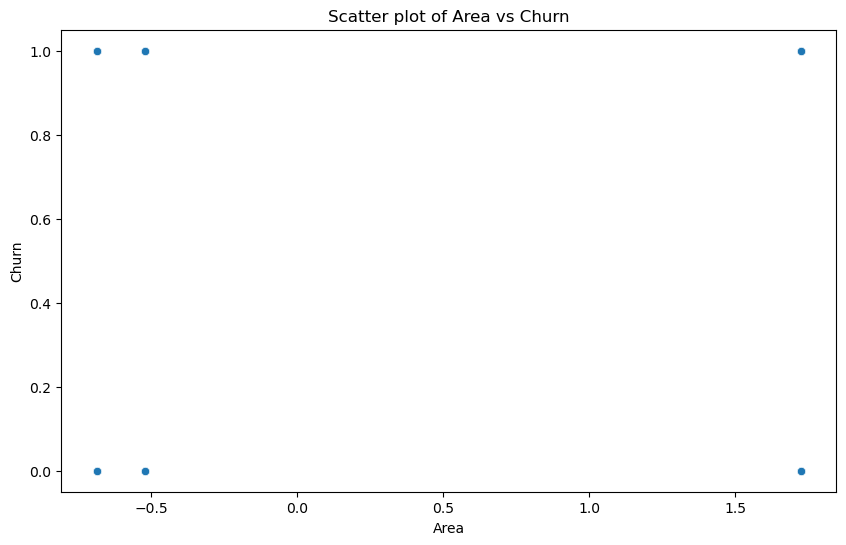

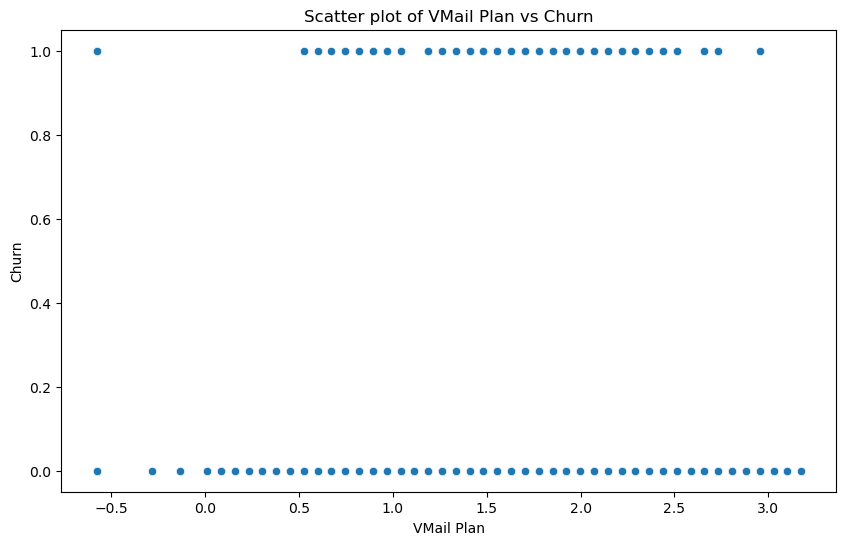

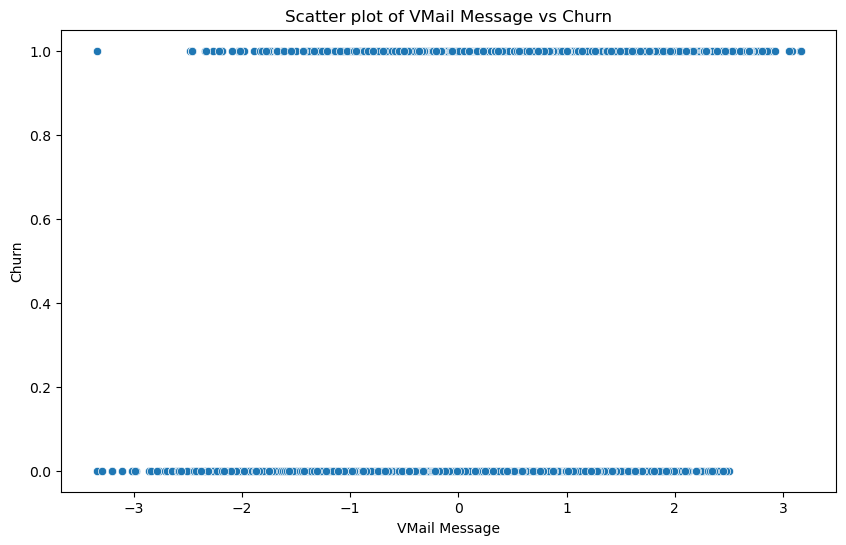

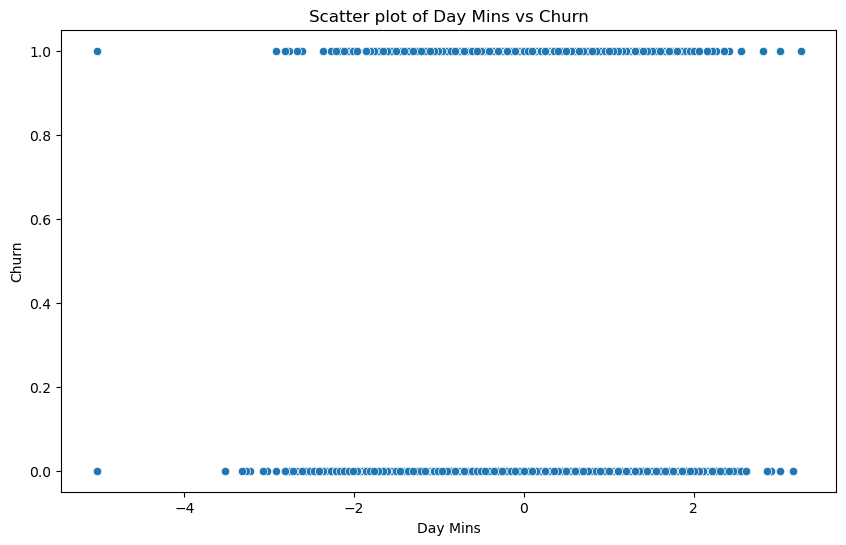

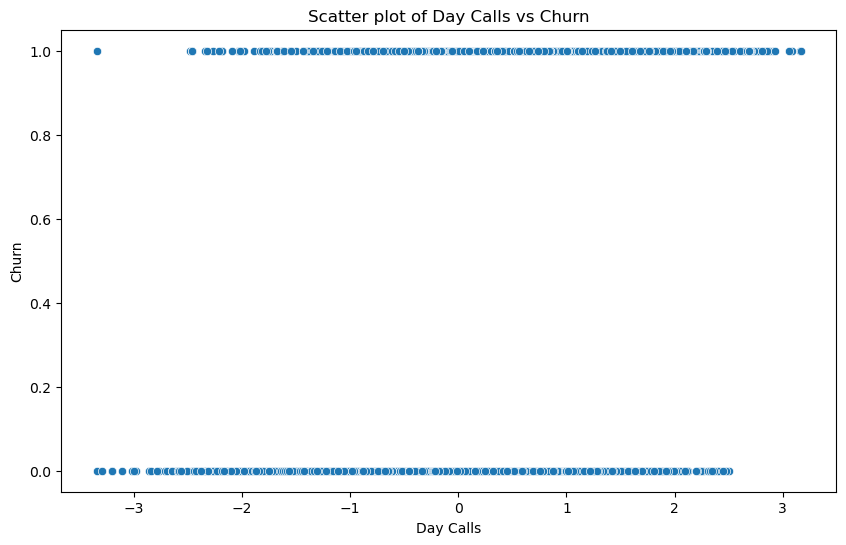

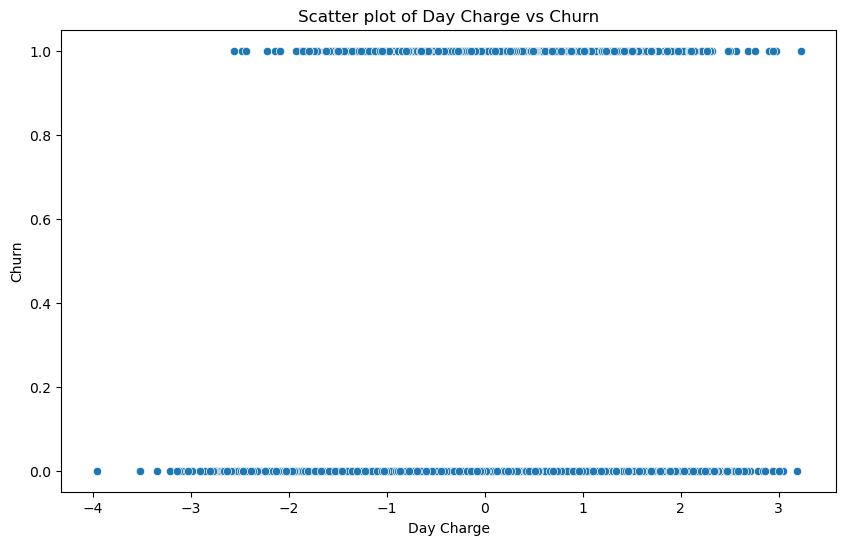

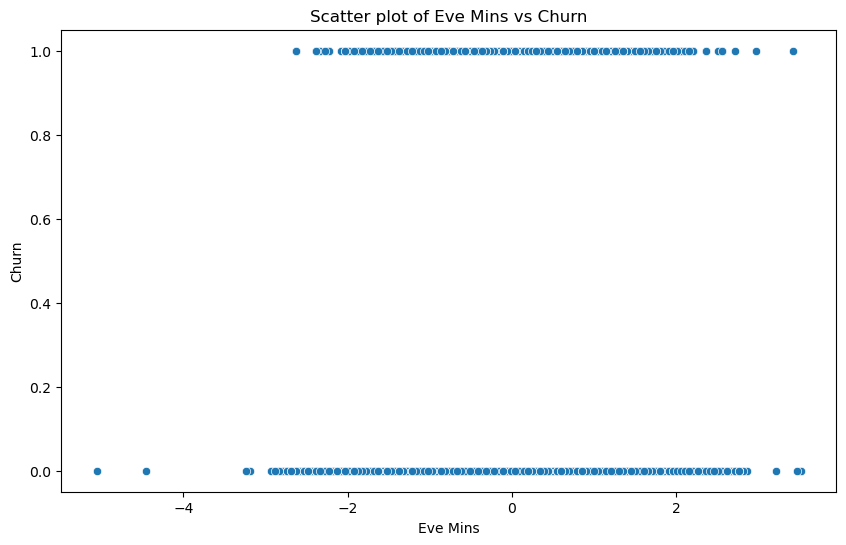

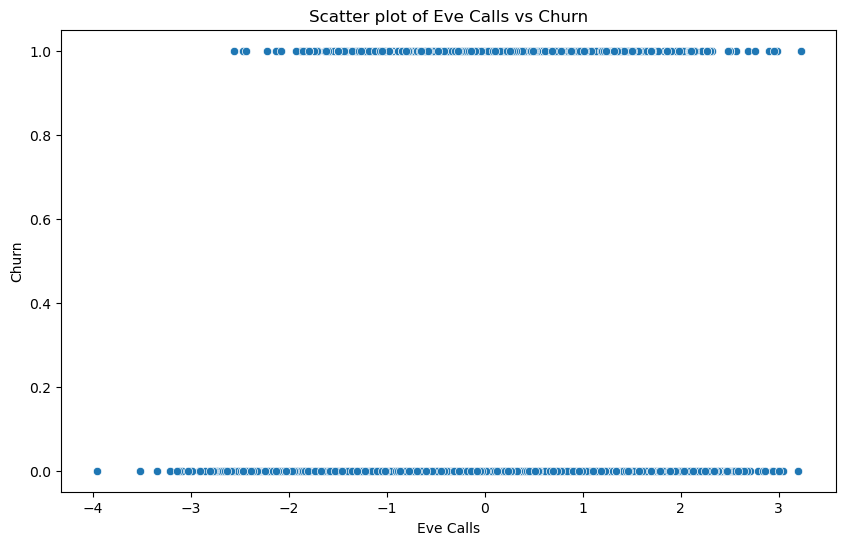

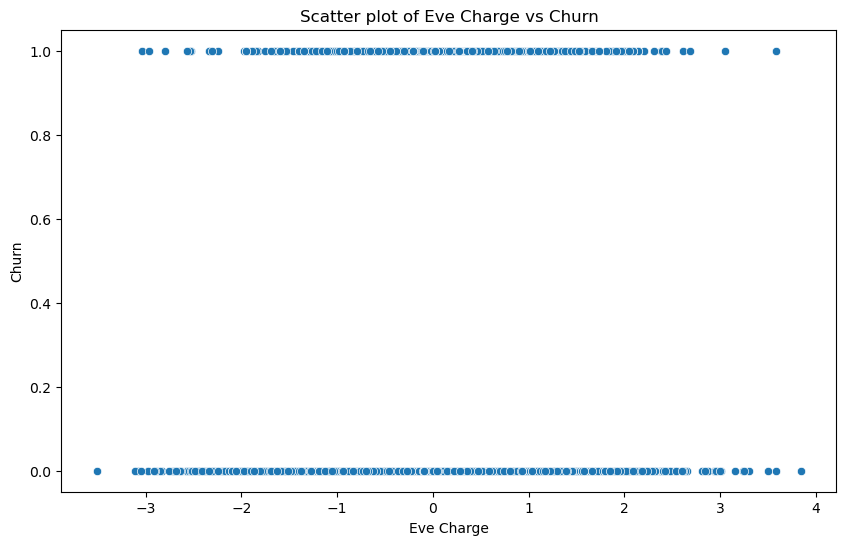

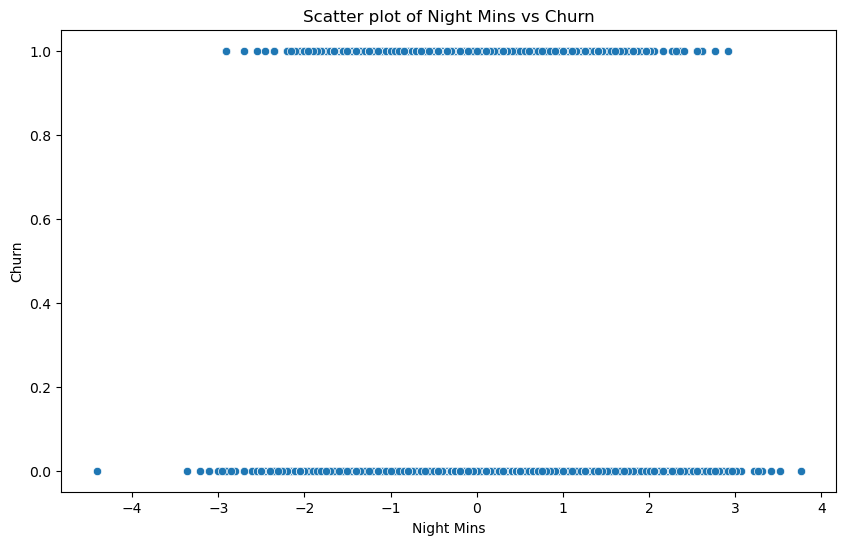

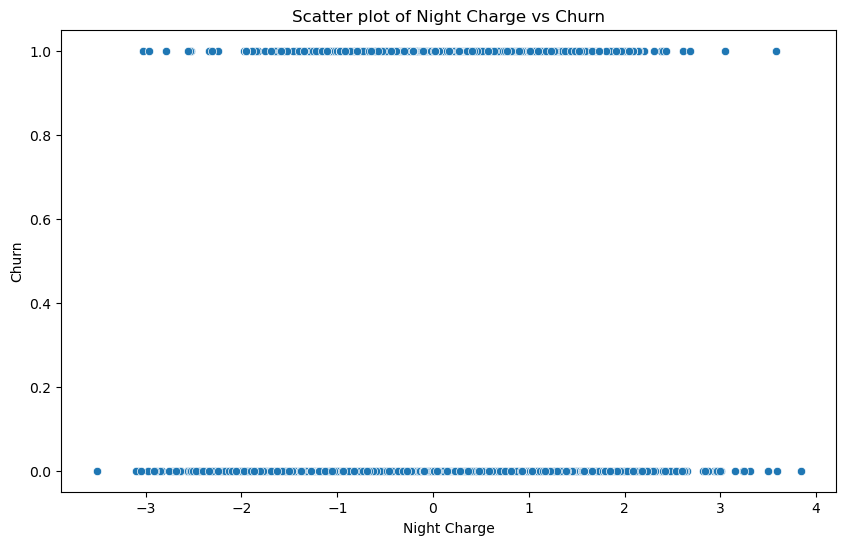

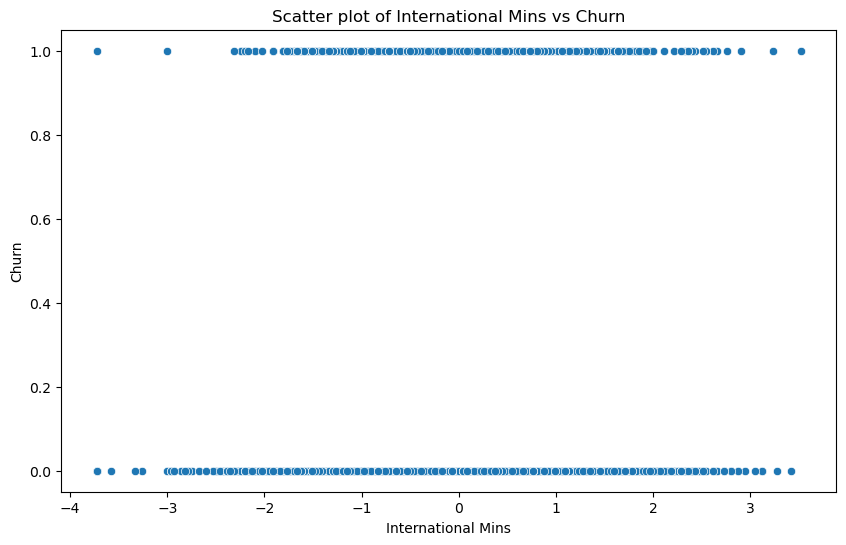

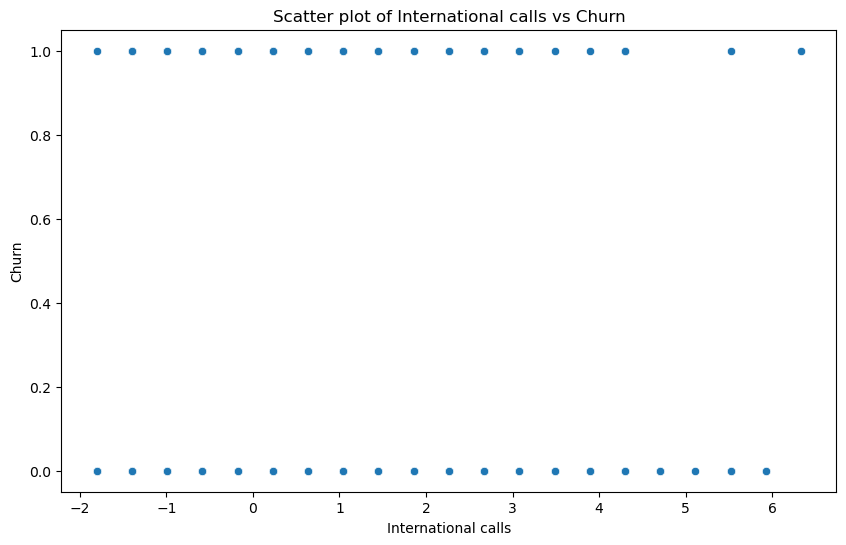

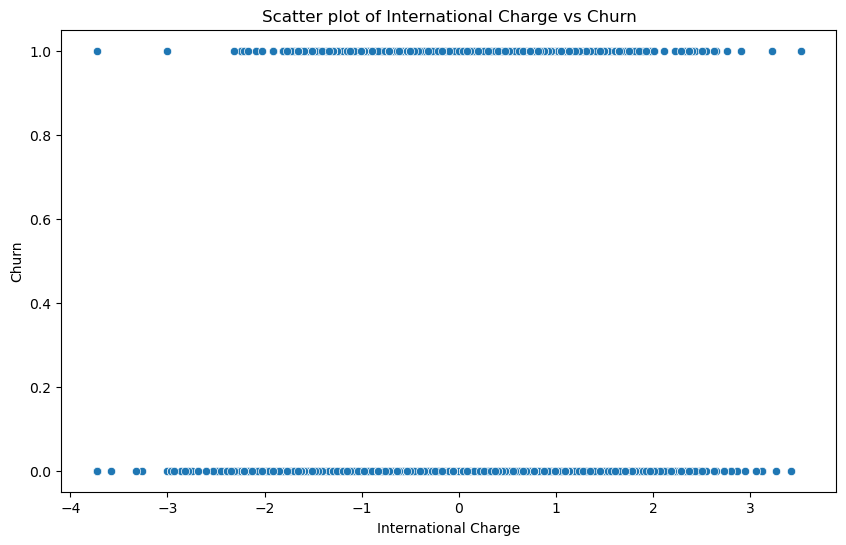

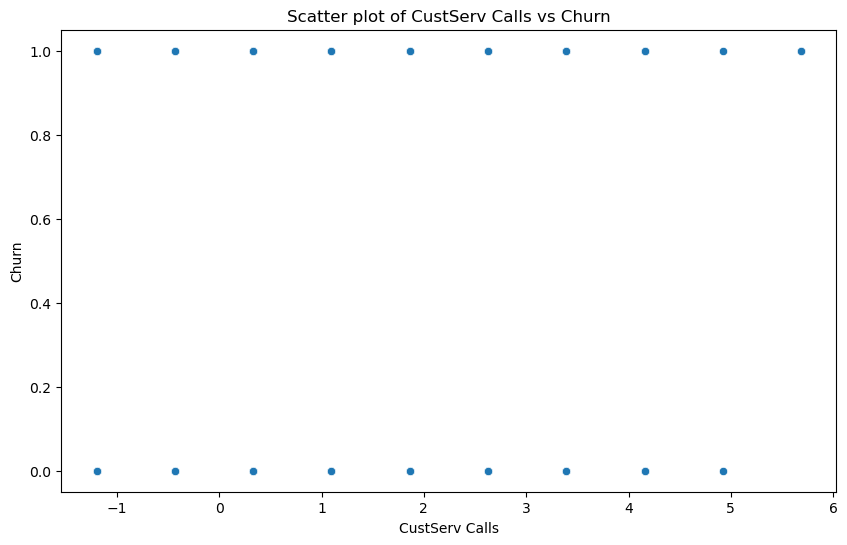

In [5]:
# Scatter plot of numerical features
for col in df_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='Churn')
    plt.title(f'Scatter plot of {col} vs Churn')
    plt.show()

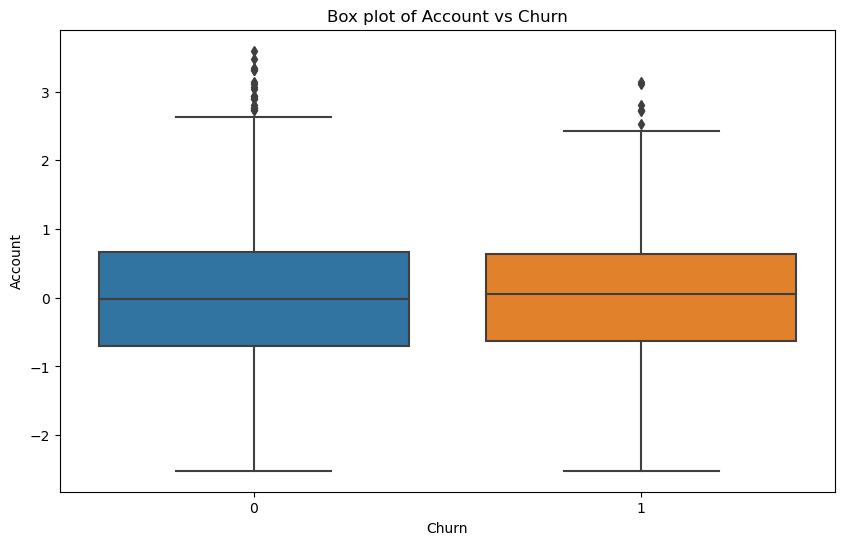

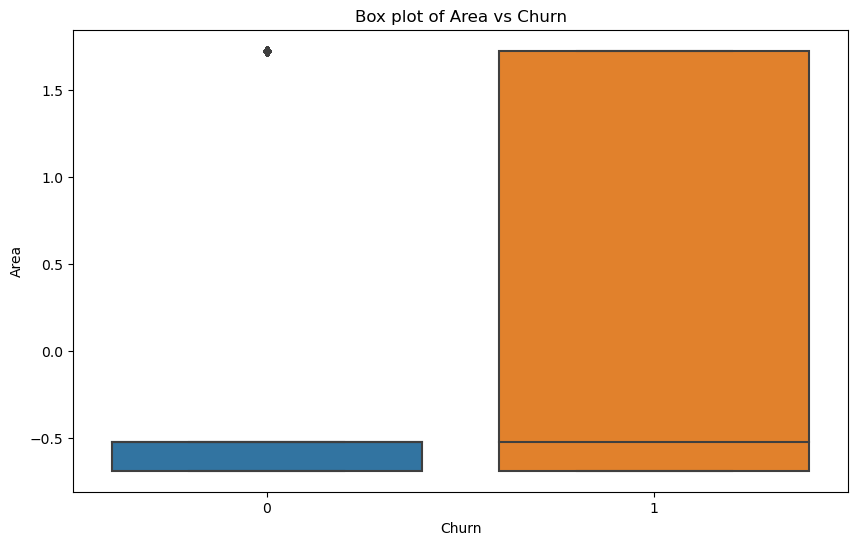

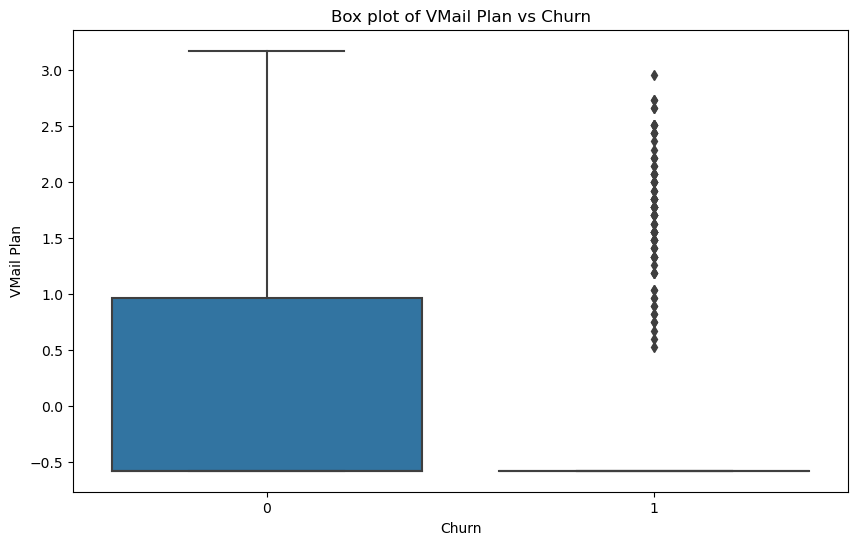

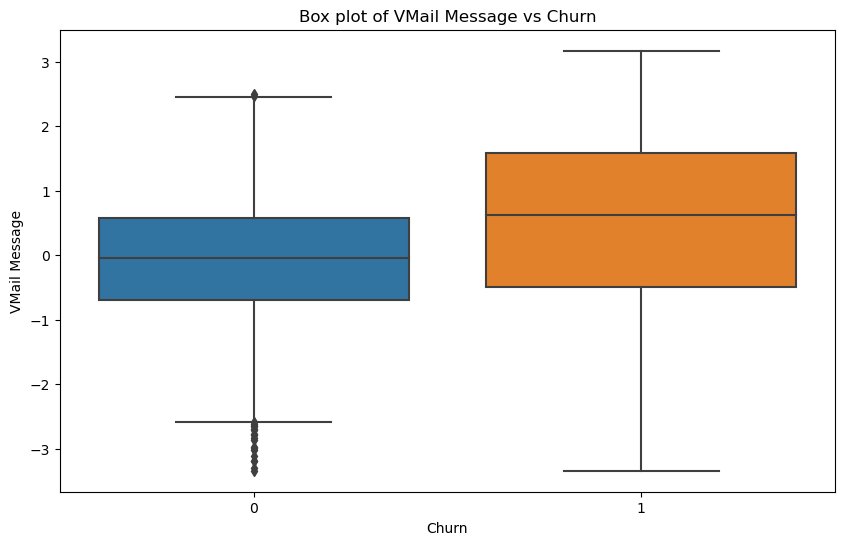

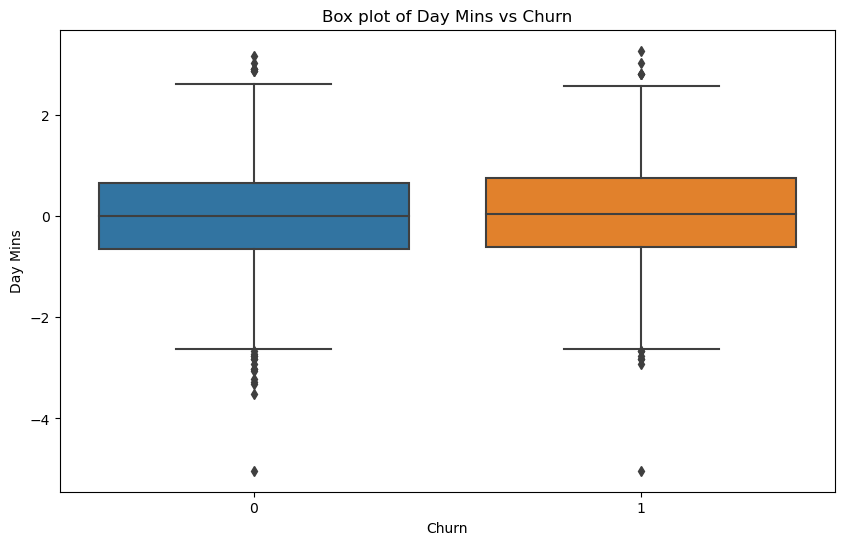

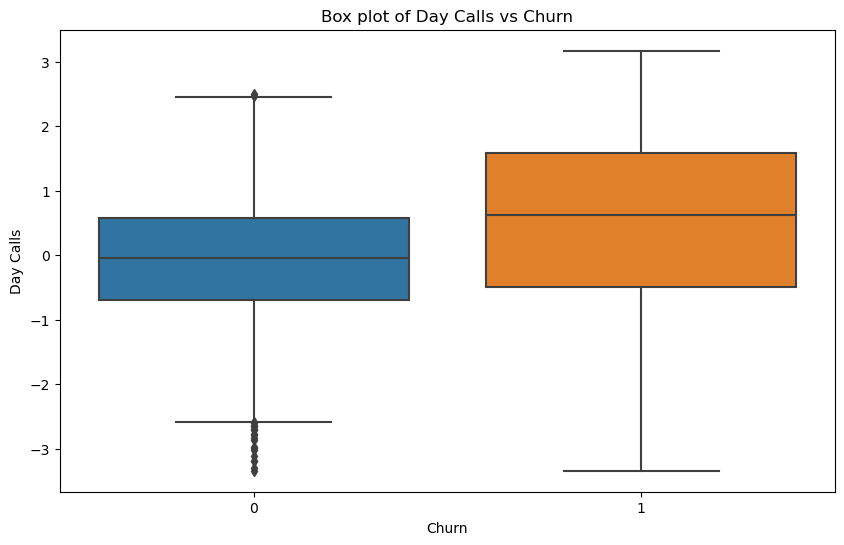

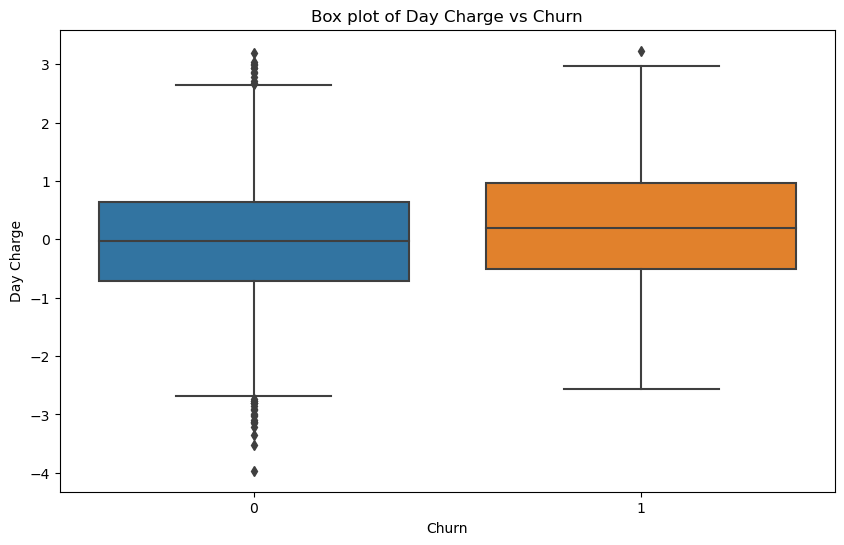

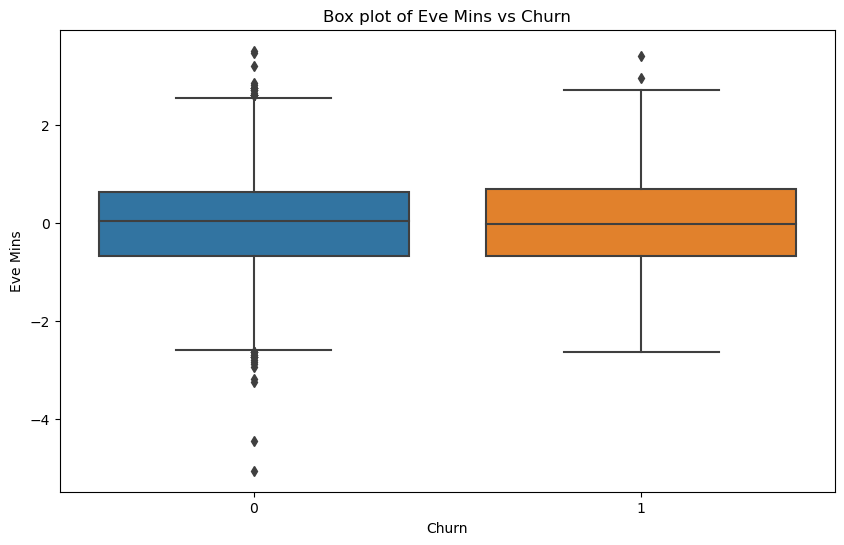

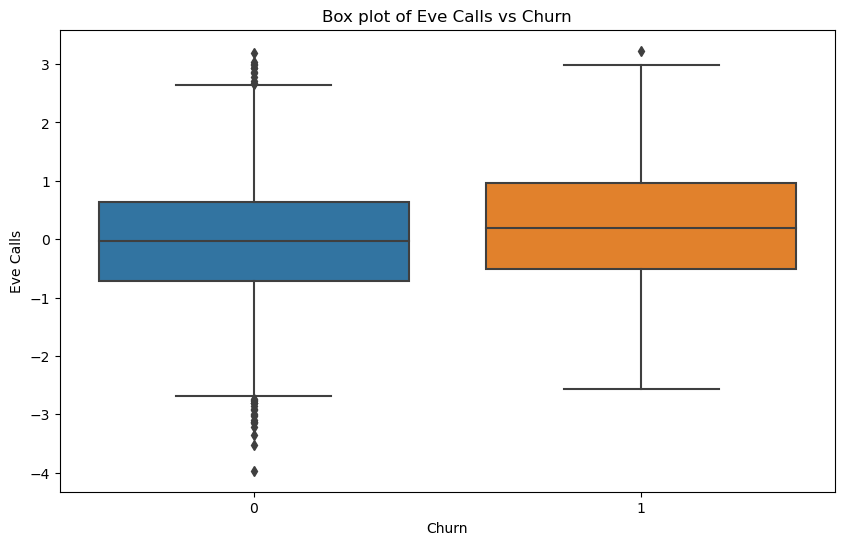

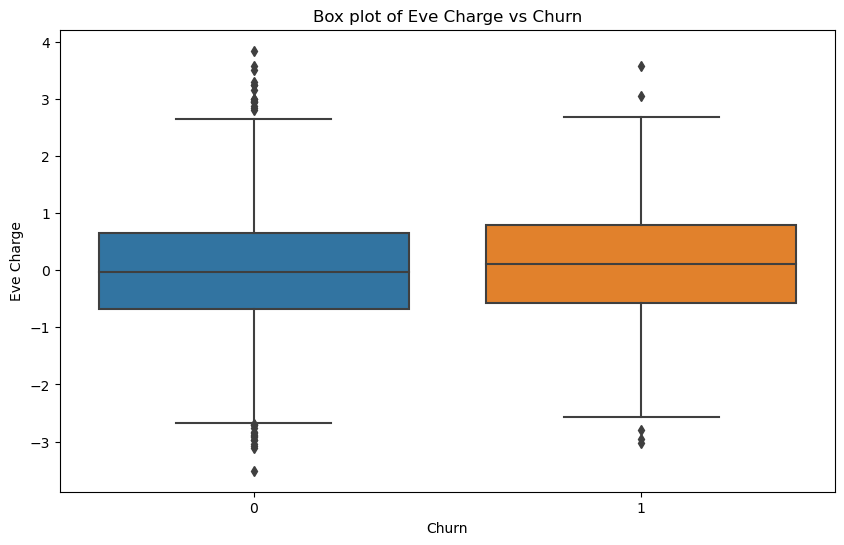

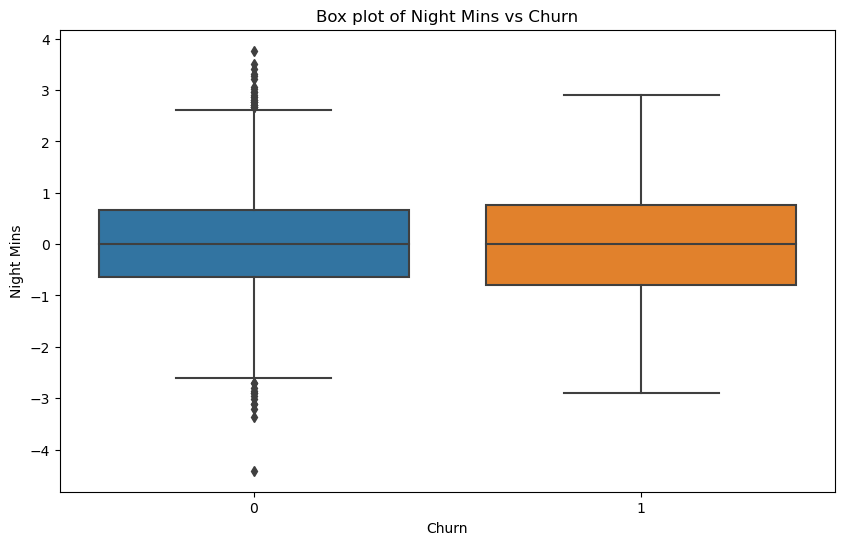

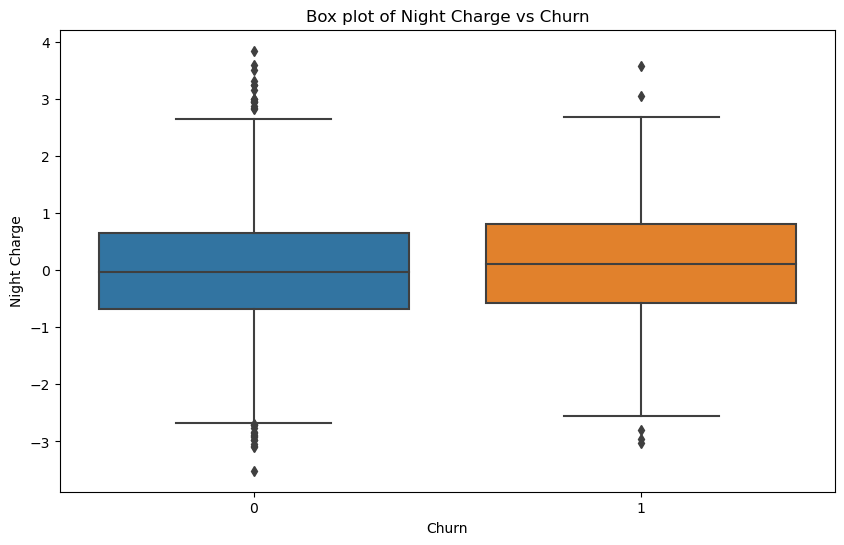

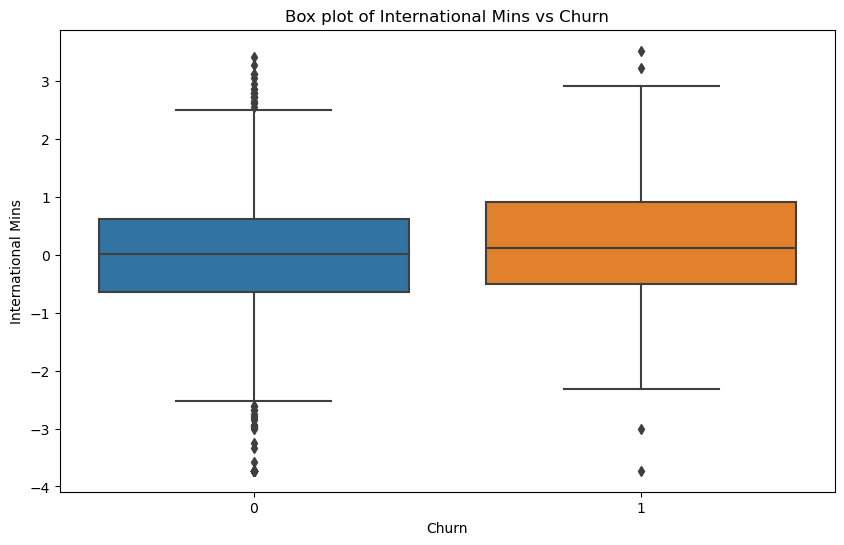

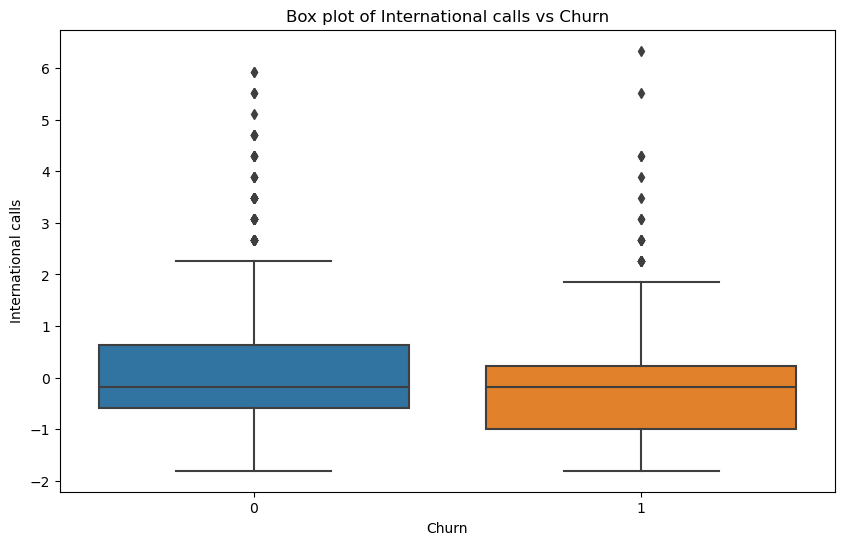

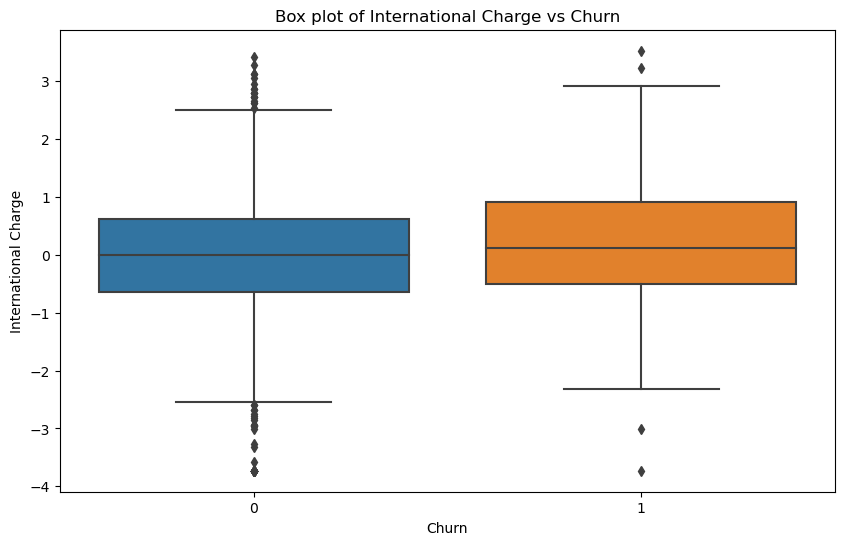

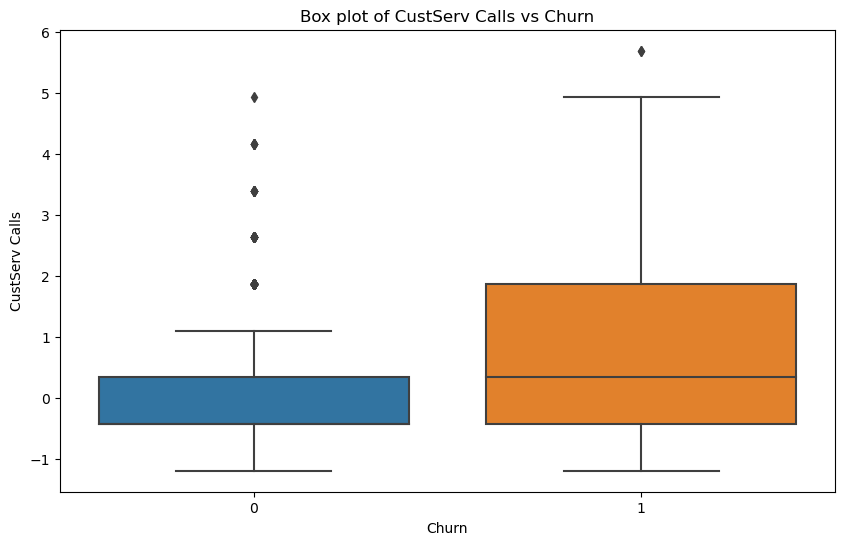

In [6]:
# Box plot of numerical features
for col in df_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Box plot of {col} vs Churn')
    plt.show()

In [7]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

             State       Account          Area         Code        Phone  \
count  4617.000000  4.617000e+03  4.617000e+03  4617.000000  4617.000000   
mean     26.041585 -1.077279e-16  6.001985e-16  2308.000000     0.096600   
std      14.790361  1.000108e+00  1.000108e+00  1332.957426     0.295444   
min       0.000000 -2.516744e+00 -6.869408e-01     0.000000     0.000000   
25%      13.000000 -6.729798e-01 -6.869408e-01  1154.000000     0.000000   
50%      26.000000 -1.629646e-02 -5.213921e-01  2308.000000     0.000000   
75%      39.000000  6.656439e-01  1.725340e+00  3462.000000     0.000000   
max      50.000000  3.595462e+00  1.725340e+00  4616.000000     1.000000   

       International Plan    VMail Plan  VMail Message      Day Mins  \
count         4617.000000  4.617000e+03   4.617000e+03  4.617000e+03   
mean             0.267706  1.538971e-17   2.639335e-16 -1.477412e-16   
std              0.442812  1.000108e+00   1.000108e+00  1.000108e+00   
min              0.000000 -

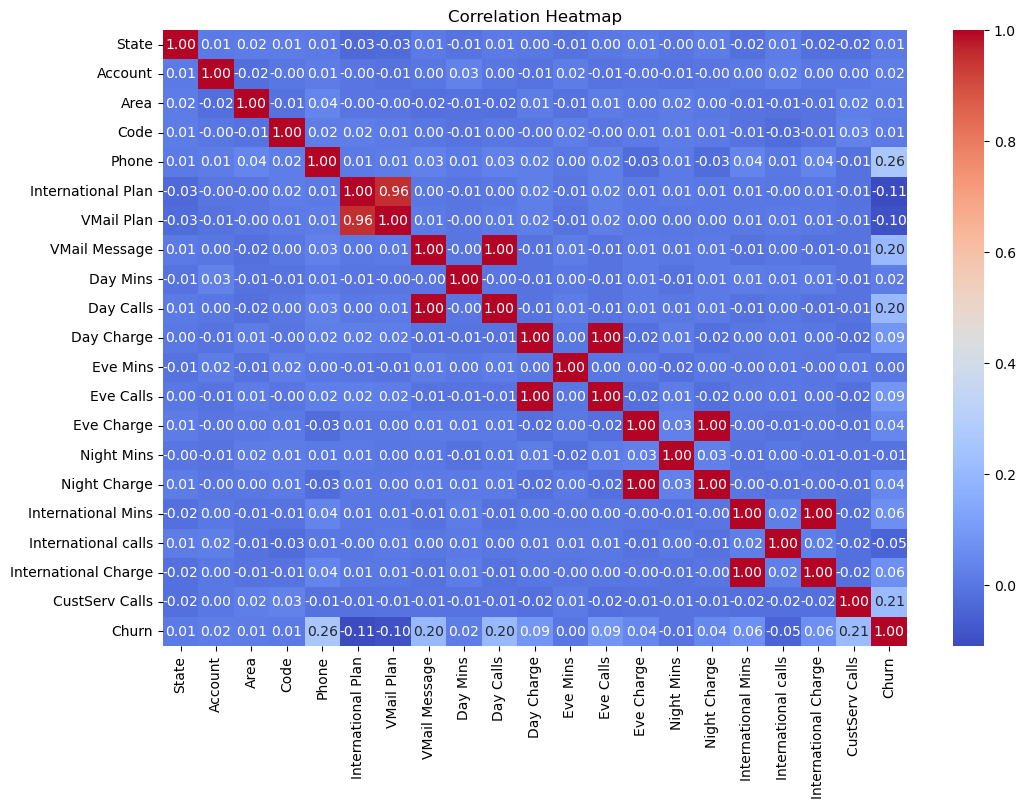

In [8]:
# Heatmap of the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# 2.4 Outlier Detection and Handling
from scipy.stats import zscore
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[numeric_columns].apply(zscore)
df = df[(z_scores < 3).all(axis=1)]

In [10]:
# Splitting data into features and target variable
X = df.drop(columns='Churn')  # assuming the target column is named 'Churn'
y = df['Churn']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 4. Choose a Model / Algorithm
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss')
}

Logistic Regression:


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8830146231721034
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       777
           1       0.62      0.18      0.28       112

    accuracy                           0.88       889
   macro avg       0.76      0.58      0.61       889
weighted avg       0.86      0.88      0.85       889

AUC-ROC: 0.8428134767420482


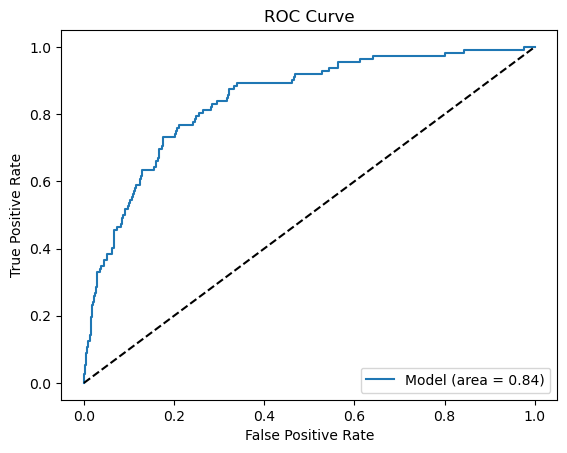

Decision Tree:
Accuracy: 0.906636670416198
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       777
           1       0.60      0.76      0.67       112

    accuracy                           0.91       889
   macro avg       0.78      0.84      0.81       889
weighted avg       0.92      0.91      0.91       889

AUC-ROC: 0.8434282496782497


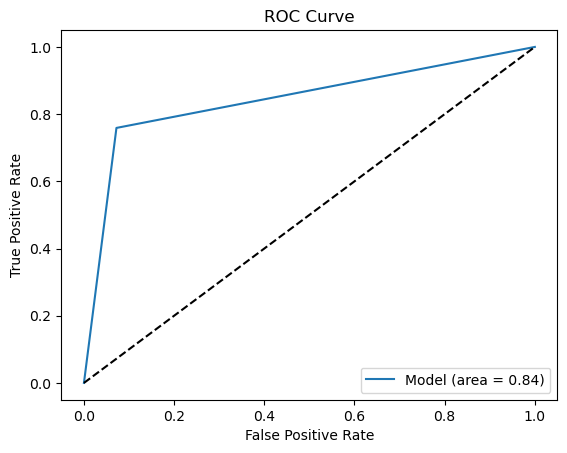

Random Forest:
Accuracy: 0.9561304836895388
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       777
           1       0.88      0.76      0.81       112

    accuracy                           0.96       889
   macro avg       0.92      0.87      0.89       889
weighted avg       0.95      0.96      0.95       889

AUC-ROC: 0.9202461389961389


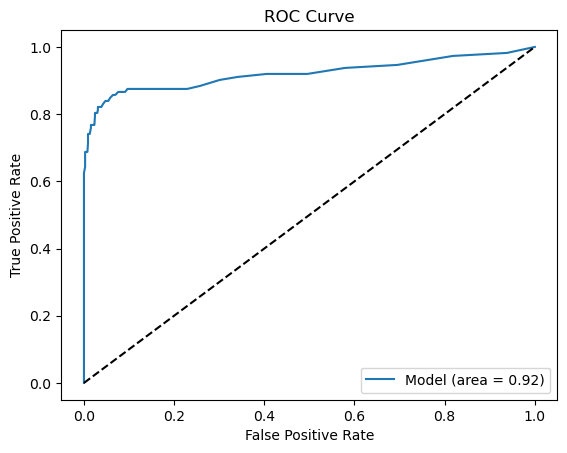

Gradient Boosting:
Accuracy: 0.9516310461192351
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       777
           1       0.86      0.73      0.79       112

    accuracy                           0.95       889
   macro avg       0.91      0.86      0.88       889
weighted avg       0.95      0.95      0.95       889

AUC-ROC: 0.9287265581908439


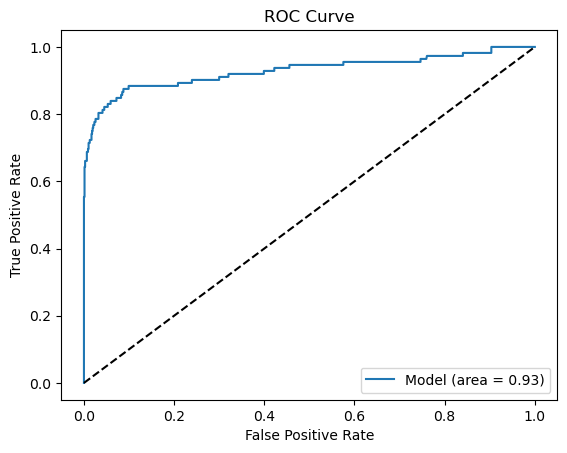

XGBoost:
Accuracy: 0.9606299212598425
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       777
           1       0.88      0.79      0.84       112

    accuracy                           0.96       889
   macro avg       0.93      0.89      0.91       889
weighted avg       0.96      0.96      0.96       889

AUC-ROC: 0.9226879941165655


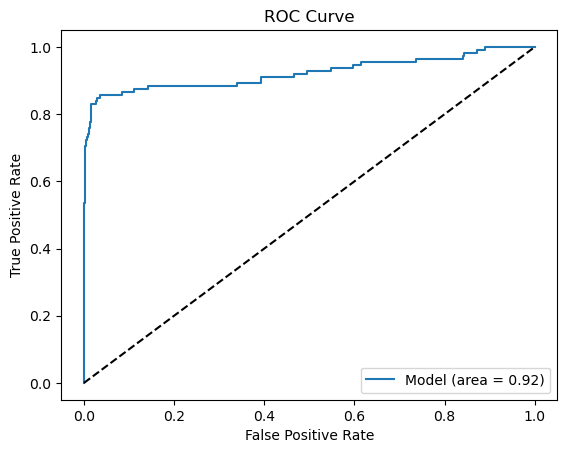

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    model.fit(X_train, y_train) # Train the model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    print('Accuracy:', accuracy)
    print('Classification Report:\n', report)
    print('AUC-ROC:', auc_roc)

    plt.plot(fpr, tpr, label=f'Model (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    # Evaluate Logistic Regression
print("Logistic Regression:")
evaluate_model(LogisticRegression(), X_test, y_test) # Pass an instance of the classifier

# Evaluate Decision Tree
print("Decision Tree:")
evaluate_model(DecisionTreeClassifier(), X_test, y_test) # Pass an instance of the classifier

# Evaluate Random Forest
print("Random Forest:")
evaluate_model(RandomForestClassifier(), X_test, y_test) # Pass an instance of the classifier

# Evaluate Gradient Boosting
print("Gradient Boosting:")
evaluate_model(GradientBoostingClassifier(), X_test, y_test) # Pass an instance of the classifier

# Evaluate XGBClassifier
print("XGBoost:")
evaluate_model(XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss'), X_test, y_test) # Pass an instance of the classifier

In [13]:
# 5. Training the Model
best_model = None
best_score = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    if auc_roc > best_score:
        best_score = auc_roc
        best_model = model
        best_model_name = name

    print(f'{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}, AUC-ROC: {auc_roc}')

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.8830146231721034, Precision: 0.625, Recall: 0.17857142857142858, F1-Score: 0.2777777777777778, AUC-ROC: 0.8428134767420482
Decision Tree - Accuracy: 0.906636670416198, Precision: 0.6058394160583942, Recall: 0.7410714285714286, F1-Score: 0.6666666666666667, AUC-ROC: 0.8357866795366796
Random Forest - Accuracy: 0.9561304836895388, Precision: 0.8762886597938144, Recall: 0.7589285714285714, F1-Score: 0.8133971291866029, AUC-ROC: 0.9188557179628608
Gradient Boosting - Accuracy: 0.9516310461192351, Precision: 0.8631578947368421, Recall: 0.7321428571428571, F1-Score: 0.792270531400966, AUC-ROC: 0.9289678709321566
XGBoost - Accuracy: 0.9606299212598425, Precision: 0.8811881188118812, Recall: 0.7946428571428571, F1-Score: 0.835680751173709, AUC-ROC: 0.9226879941165655


In [14]:
# 6. Evaluate the Model
print(f"Best Model: {best_model_name} with AUC-ROC: {best_score}")


Best Model: Gradient Boosting with AUC-ROC: 0.9289678709321566


In [15]:
# 7. Parameter Tuning (using GridSearchCV for the best model)
if best_model_name == 'Logistic Regression':
    param_grid = {'C': [0.1, 1, 10]}
elif best_model_name == 'Decision Tree':
    param_grid = {'max_depth': [3, 5, 7]}
elif best_model_name == 'Random Forest':
    param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']}
elif best_model_name == 'Gradient Boosting':
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
elif best_model_name == 'XGBoost':
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

grid_search = GridSearchCV(estimator=models[best_model_name], param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [16]:
# 8. Make Predictions
y_prob = best_model.predict_proba(X_test)[:, 1]
churn_risk_scores = pd.DataFrame({'CustomerID': X_test.index, 'Churn_Risk_Score': y_prob})

# Introducing Churn-FLAG
threshold = 0.5
churn_flags = (y_prob >= threshold).astype(int)
churn_flag_df = pd.DataFrame({'CustomerID': X_test.index, 'Churn_Flag': churn_flags})

# Output the final best model and its parameters
print(f"Best Model: {best_model_name} with Parameters: {best_params}")

Best Model: Gradient Boosting with Parameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [17]:
# 8. Make Predictions
# Ensure to remove 'Churn Risk Score' and 'CHURN-FLAG' if they exist
if 'Churn Risk Score' in X_test.columns:
    X_test = X_test.drop(columns=['Churn Risk Score'])
if 'CHURN-FLAG' in X_test.columns:
    X_test = X_test.drop(columns=['CHURN-FLAG'])

# Predict churn probabilities using the best_model
churn_prob = best_model.predict_proba(X_test)[:, 1]  # Use best_model instead of RandomForestClassifier

# Assign a churn risk score
X_test['Churn Risk Score'] = churn_prob

# Set threshold (e.g., 0.5) to create CHURN-FLAG
threshold = 0.5
X_test['CHURN-FLAG'] = (X_test['Churn Risk Score'] > threshold).astype(int)

# Display the first few rows with churn risk scores and CHURN-FLAG
print(X_test[['Churn Risk Score', 'CHURN-FLAG']].head())


      Churn Risk Score  CHURN-FLAG
1511          0.020967           0
2191          0.042875           0
1996          0.031018           0
4333          0.022899           0
138           0.011228           0


In [18]:
# Save the model
import joblib

# Save the model
model_filename = 'best_churn_model.pkl'
joblib.dump(best_model, model_filename)

# Load the model for prediction
loaded_model = joblib.load(model_filename)

In [19]:
import shutil

# Copy the model to a different filename
new_model_filename = 'best_churn_model_final.pkl'  # Choose a different name
shutil.copy(model_filename, new_model_filename)  # Copy to a new file

# Display a download link (adjust the path if needed)
from IPython.display import FileLink
FileLink(new_model_filename)  # Link to the copied file

C:\Users\Dell\Downloads\best_churn_model_final.pkl